In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE
from mlxtend .feature_selection import SequentialFeatureSelector as sfs

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

### Attributes Description

ID	--> Unique Identifier for a row<br>
City_Code -->	Code for the City of the customers<br>
Region_Code -->	Code for the Region of the customers<br>
Accomodation_Type -->	Customer Owns or Rents the house<br>
Reco_Insurance_Type -->	Joint or Individual type for the recommended insurance  <br>
Upper_Age -->	Maximum age of the customer <br>
Lower _Age -->	Minimum age of the customer<br>
Is_Spouse -->	If the customers are married to each other (in case of joint insurance) <br>
Health_Indicator --> Encoded values for health of the customer<br>
Holding_Policy_Duration	--> Duration (in years) of holding policy (a policy that customer has already subscribed to with the company)<br>
Holding_Policy_Type --> Type of holding policy<br>
Reco_Policy_Cat	--> Encoded value for recommended health insurance<br>
Reco_Policy_Premium -->	Annual Premium (INR) for the recommended health insurance<br>
Response (Target) -->	
* 0 : Customer did not show interest in the recommended policy,
* 1 : Customer showed interest in the recommended policy

In [178]:
train = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Health Insurance Lead Prediction/train.csv")
test = pd.read_csv("C:/Users/91899/Desktop/Analyatics Vidhya/Health Insurance Lead Prediction/test.csv")

In [179]:
train.head(10)

,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,1,C3,3213,Rented,Individual,36,36,No,X1,14+,3.0,22,11628.0,0
1,2,C5,1117,Owned,Joint,75,22,No,X2,NaN,NaN,22,30510.0,0
2,3,C5,3732,Owned,Individual,32,32,No,NaN,1.0,1.0,19,7450.0,1
3,4,C24,4378,Owned,Joint,52,48,No,X1,14+,3.0,19,17780.0,0
4,5,C8,2190,Rented,Individual,44,44,No,X2,3.0,1.0,16,10404.0,0
5,6,C9,1785,Rented,Individual,52,52,No,X2,5.0,1.0,22,15264.0,1
6,7,C3,679,Owned,Individual,28,28,No,NaN,NaN,NaN,17,10640.0,0
7,8,C1,3175,Owned,Joint,75,73,Yes,X4,9.0,4.0,17,29344.0,1
8,9,C15,3497,Owned,Joint,52,43,No,X1,14.0,3.0,1,27283.2,0
9,10,C1,530,Owned,Joint,59,26,Yes,NaN,7.0,4.0,18,21100.8,1


In [180]:
train.shape

(50882, 14)

In [181]:
# Lets find out the datatypes of features
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
ID                         50882 non-null int64
City_Code                  50882 non-null object
Region_Code                50882 non-null int64
Accomodation_Type          50882 non-null object
Reco_Insurance_Type        50882 non-null object
Upper_Age                  50882 non-null int64
Lower_Age                  50882 non-null int64
Is_Spouse                  50882 non-null object
Health Indicator           39191 non-null object
Holding_Policy_Duration    30631 non-null object
Holding_Policy_Type        30631 non-null float64
Reco_Policy_Cat            50882 non-null int64
Reco_Policy_Premium        50882 non-null float64
Response                   50882 non-null int64
dtypes: float64(2), int64(6), object(6)
memory usage: 5.4+ MB


In [182]:
train.describe()

,ID,Region_Code,Upper_Age,Lower_Age,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
count,50882.000000,50882.000000,50882.000000,50882.000000,30631.000000,50882.000000,50882.000000,50882.000000
mean,25441.500000,1732.788707,44.856275,42.738866,2.439228,15.115188,14183.950069,0.239947
std,14688.512535,1424.081652,17.310271,17.319375,1.025923,6.340663,6590.074873,0.427055
min,1.000000,1.000000,18.000000,16.000000,1.000000,1.000000,2280.000000,0.000000
25%,12721.250000,523.000000,28.000000,27.000000,1.000000,12.000000,9248.000000,0.000000
50%,25441.500000,1391.000000,44.000000,40.000000,3.000000,17.000000,13178.000000,0.000000
75%,38161.750000,2667.000000,59.000000,57.000000,3.000000,20.000000,18096.000000,0.000000
max,50882.000000,6194.000000,75.000000,75.000000,4.000000,22.000000,43350.400000,1.000000


In [183]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21805 entries, 0 to 21804
Data columns (total 13 columns):
ID                         21805 non-null int64
City_Code                  21805 non-null object
Region_Code                21805 non-null int64
Accomodation_Type          21805 non-null object
Reco_Insurance_Type        21805 non-null object
Upper_Age                  21805 non-null int64
Lower_Age                  21805 non-null int64
Is_Spouse                  21805 non-null object
Health Indicator           16778 non-null object
Holding_Policy_Duration    13202 non-null object
Holding_Policy_Type        13202 non-null float64
Reco_Policy_Cat            21805 non-null int64
Reco_Policy_Premium        21805 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 2.2+ MB


In [184]:
# Lets find if there are any Nan values
train.isna().sum()

ID                             0
City_Code                      0
Region_Code                    0
Accomodation_Type              0
Reco_Insurance_Type            0
Upper_Age                      0
Lower_Age                      0
Is_Spouse                      0
Health Indicator           11691
Holding_Policy_Duration    20251
Holding_Policy_Type        20251
Reco_Policy_Cat                0
Reco_Policy_Premium            0
Response                       0
dtype: int64

In [185]:
test.isna().sum()

ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           5027
Holding_Policy_Duration    8603
Holding_Policy_Type        8603
Reco_Policy_Cat               0
Reco_Policy_Premium           0
dtype: int64

In [186]:
(train.isna().sum()/train.shape[0]) * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           22.976691
Holding_Policy_Duration    39.799929
Holding_Policy_Type        39.799929
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
Response                    0.000000
dtype: float64

In [187]:
(test.isna().sum()/test.shape[0]) * 100

ID                          0.000000
City_Code                   0.000000
Region_Code                 0.000000
Accomodation_Type           0.000000
Reco_Insurance_Type         0.000000
Upper_Age                   0.000000
Lower_Age                   0.000000
Is_Spouse                   0.000000
Health Indicator           23.054345
Holding_Policy_Duration    39.454254
Holding_Policy_Type        39.454254
Reco_Policy_Cat             0.000000
Reco_Policy_Premium         0.000000
dtype: float64

In [188]:
# Approximately 40% of the data is Nan in Holding_Policy_Duration and Holding_Policy_type.
# So instead of filling it with some values which we don't know it would be good for our modeling, let's drop these columns.
# So, Health Indicator is also having 23% Nan values, let's drop this column also.

In [189]:
train_df = train.drop(["Health Indicator", "Holding_Policy_Duration", "Holding_Policy_Type", "Lower_Age","ID"], axis =1, inplace = False)
test_df = test.drop(["Health Indicator", "Holding_Policy_Duration", "Holding_Policy_Type", "Lower_Age", "ID"], axis =1, inplace = False)

In [190]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 9 columns):
City_Code              50882 non-null object
Region_Code            50882 non-null int64
Accomodation_Type      50882 non-null object
Reco_Insurance_Type    50882 non-null object
Upper_Age              50882 non-null int64
Is_Spouse              50882 non-null object
Reco_Policy_Cat        50882 non-null int64
Reco_Policy_Premium    50882 non-null float64
Response               50882 non-null int64
dtypes: float64(1), int64(4), object(4)
memory usage: 3.5+ MB


In [191]:
train_df["Region_Code"].unique()

array([3213, 1117, 3732, ..., 5326, 6149, 5450], dtype=int64)

In [192]:
train_df["Response"].value_counts()

0    38673
1    12209
Name: Response, dtype: int64

In [193]:
# It is an imbalanced dataset
(train_df["Response"].value_counts()[0]/ train_df["Response"].value_counts()[1]) 

3.1675812924891473

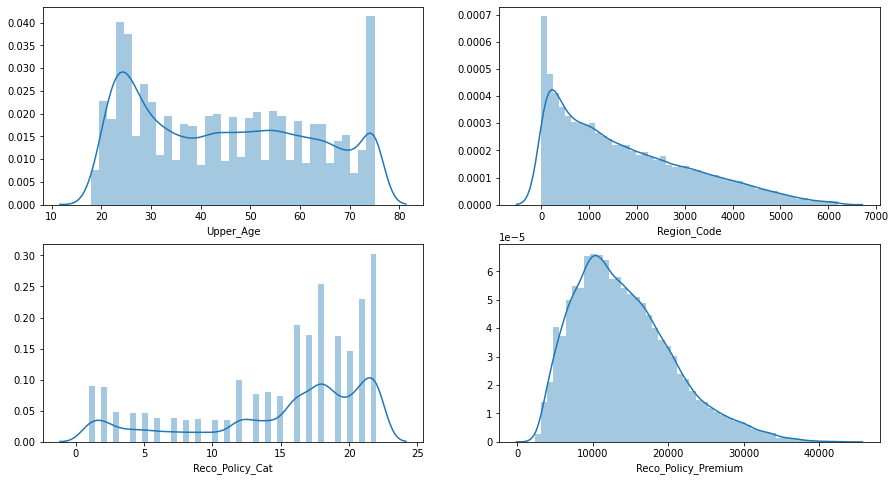

In [194]:
fig, axes = plt.subplots( 2,2 , figsize = (15,8))
sns.distplot(train["Upper_Age"], ax = axes[0,0])
sns.distplot(train["Region_Code"], ax = axes[0,1])
sns.distplot(train["Reco_Policy_Cat"], ax = axes[1,0])
sns.distplot(train["Reco_Policy_Premium"], ax = axes[1,1])
plt.show()

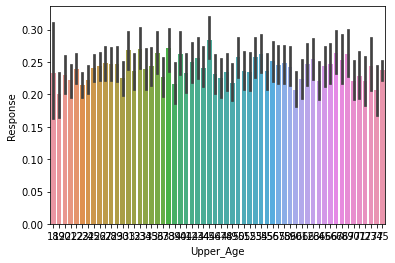

In [195]:
sns.barplot(train["Upper_Age"], train["Response"])
plt.show()

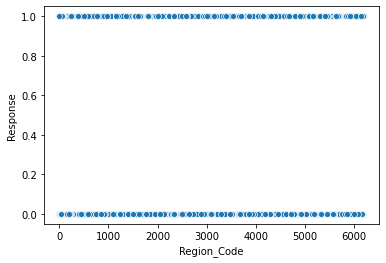

In [196]:
sns.scatterplot(train["Region_Code"], train["Response"])
plt.show()

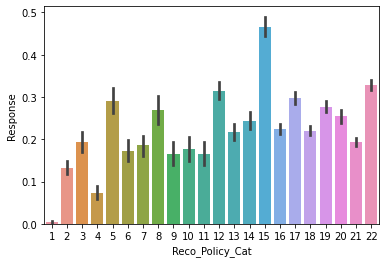

In [197]:
sns.barplot(train["Reco_Policy_Cat"], train["Response"])
plt.show()

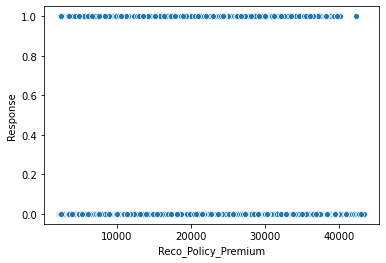

In [198]:
sns.scatterplot(train["Reco_Policy_Premium"], train["Response"])
plt.show()

In [199]:
## Feature Engineering

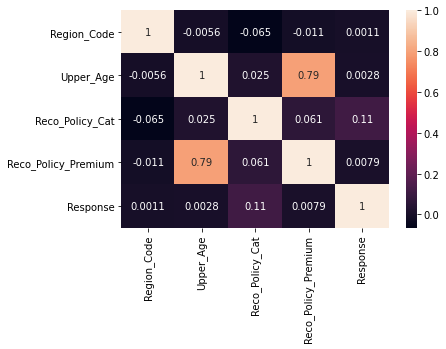

In [200]:
sns.heatmap(train_df.corr(), annot = True)
plt.show()

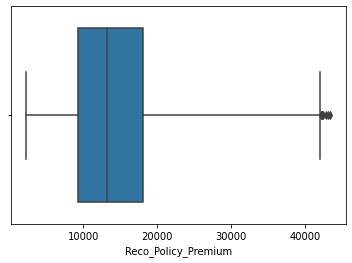

In [202]:
sns.boxplot(train_df["Reco_Policy_Premium"], whis = 2.7)
plt.show()

In [203]:
q1 = train_df['Reco_Policy_Premium'].quantile(0.25)
q3 = train_df['Reco_Policy_Premium'].quantile(0.75)
IQR = q3 - q1
IQR

8848.0

In [204]:
upper_limit = q3 + 2.7*IQR
upper_limit

41985.600000000006

In [205]:
lower_limit = q1 - 1.5*IQR
lower_limit

-4024.0

In [206]:
train_df[train_df['Reco_Policy_Premium'] > upper_limit]

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response
1905,C24,1868,Owned,Joint,75,No,22,42316.8,1
5826,C1,1732,Rented,Joint,73,No,6,42240.0,0
7080,C2,1717,Owned,Joint,75,No,18,43350.4,0
7975,C2,2329,Rented,Joint,75,Yes,22,42256.0,0
14908,C7,5033,Owned,Joint,75,Yes,21,42066.0,0
44606,C1,1823,Owned,Joint,74,Yes,21,42739.2,0
46547,C24,1194,Owned,Joint,75,No,19,43046.4,0


In [207]:
train_df.drop(train_df[train_df['Reco_Policy_Premium'] > upper_limit].index, axis =0, inplace = True)

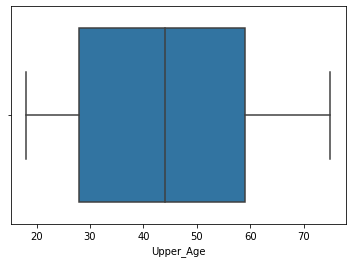

In [208]:
sns.boxplot(train_df["Upper_Age"])
plt.show()

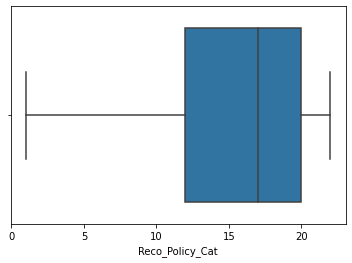

In [209]:
sns.boxplot(train_df["Reco_Policy_Cat"])
plt.show()

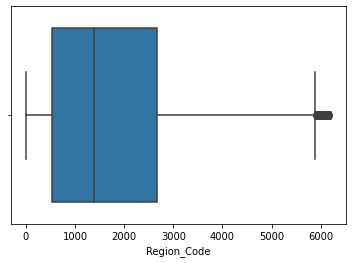

In [210]:
sns.boxplot(train_df["Region_Code"])
plt.show()

In [105]:
train_df.columns

Index(['City_Code', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Is_Spouse', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'city_code'],
      dtype='object')

In [106]:
train_df["City_Code"].value_counts(ascending = True)

C31      15
C36      36
C35      56
C30      58
C34     130
C32     160
C28     285
C33     286
C27     295
C25     366
C29     387
C26     499
C22     516
C24     551
C23     587
C21     679
C14     746
C18     797
C12     868
C19     899
C20     926
C13    1005
C16    1135
C11    1147
C17    1159
C15    1186
C5     1364
C10    1611
C8     1806
C7     1909
C6     1950
C9     2185
C4     3671
C3     4889
C2     7745
C1     8971
Name: City_Code, dtype: int64

In [266]:
Zone_C1 = ["C1" , "C2" ,"C3" , "C4" , "C5" , "C6" , "C7" , "C8", "C9" , "C10"]
Zone_C2 = ["C11" , "C12" , "C13" , "C14", "C15" , "C16", "C17" , "C18", "C19" , "C20"]
Zone_C3 = ["C21" , "C22" , "C23" , "C24", "C25" , "C26", "C27" , "C28", "C29" , "C30"]

def city_code(x):
    if(x in Zone_C1):
        return ("Zone C1")
    elif(x in Zone_C2):
        return ("Zone C2")
    elif(x in Zone_C3):
        return ("Zone C3")
    else:
        return("Zone C4")
train_df["city_code"] = train_df["City_Code"].apply(city_code)

In [267]:
test_df["city_code"] = test_df["City_Code"].apply(city_code)

In [268]:
train_df["city_code"].value_counts()

Zone C1    36101
Zone C2     9868
Zone C3     4223
Zone C4      683
Name: city_code, dtype: int64

In [269]:
train_df["Accomodation_Type"].value_counts()

Owned     27946
Rented    22929
Name: Accomodation_Type, dtype: int64

In [270]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_df["Accomodation_Type"] = lb.fit_transform(train_df["Accomodation_Type"])
test_df["Accomodation_Type"] = lb.fit_transform(test_df["Accomodation_Type"])

In [271]:
train_df["Reco_Insurance_Type"] = lb.fit_transform(train_df["Reco_Insurance_Type"])
test_df["Reco_Insurance_Type"] = lb.fit_transform(test_df["Reco_Insurance_Type"])

In [272]:
train_df["Is_Spouse"] = lb.fit_transform(train_df["Is_Spouse"])
test_df["Is_Spouse"] = lb.fit_transform(test_df["Is_Spouse"])

In [273]:
train_df["city_code"] = lb.fit_transform(train_df["city_code"])
test_df["city_code"] = lb.fit_transform(test_df["city_code"])

In [274]:
Low_Prem = [1, 2 ,3 , 4 , 5 , 6 , 7 , 8, 9 , 10]
Med_Prem = [11 , 12 , 13 , 14, 15 , 16, 17 ]
High_Prem = [18, 19,20, 21,22]

def policy_cat(x):
    if(x in Low_Prem):
        return ("Low_Prem")
    elif(x in Med_Prem):
        return ("Med_Prem")
    else:
        return("High_Prem")
train_df["Policy_cat"] = train_df["Reco_Policy_Cat"].apply(policy_cat)
test_df["Policy_cat"] = test_df["Reco_Policy_Cat"].apply(policy_cat)

In [275]:
train_df["Policy_cat"] = lb.fit_transform(train_df["Policy_cat"])
test_df["Policy_cat"] = lb.fit_transform(test_df["Policy_cat"])

In [276]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [277]:
train_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]] = mms.fit_transform(train_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]])

In [368]:
test_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]] = mms.fit_transform(test_df[["Upper_Age", "Reco_Policy_Premium", "Region_Code"]])

In [278]:
train_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,Response,city_code,Policy_cat
0,C3,0.518650,1,0,0.315789,0,22,0.235746,0,0,0
1,C5,0.180203,0,1,1.000000,0,22,0.711930,0,0,0
2,C5,0.602454,0,0,0.245614,0,19,0.130382,1,0,0
3,C24,0.706766,0,1,0.596491,0,19,0.390893,0,2,0
4,C8,0.353464,1,0,0.456140,0,16,0.204878,0,0,2


In [369]:
test_df.head()

,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,city_code,Policy_cat
0,C1,0.025065,0,0,0.210526,0,5,0.235009,0,1
1,C4,0.000970,0,1,0.894737,1,18,0.722007,0,0
2,C1,0.091041,1,0,0.175439,0,17,0.170286,0,2
3,C3,0.190168,1,0,0.087719,0,18,0.166587,0,0
4,C1,0.153622,0,0,1.000000,0,5,0.489669,0,1


In [438]:
X = train_df.drop(["City_Code", "Reco_Policy_Cat","Policy_cat", "Response"], inplace = False, axis =1)
y = train_df["Response"]

In [439]:
test_data = test_df.drop(["City_Code", "Reco_Policy_Cat", "Policy_cat"], inplace = False, axis =1)

In [440]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [441]:
#Regressions
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import scikitplot as skplt
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,classification_report

In [442]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [443]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [444]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({0: 30959, 1: 9741})
After SMOTE: Counter({0: 30959, 1: 30959})


In [445]:
print("Precision: ", precision_score(y_test, y_pred.round()))
print("Recall Score: ", recall_score(y_test ,y_pred.round()))
print("F1 score: ", f1_score( y_test, y_pred.round()))

Precision:  0.236381644106966
Recall Score:  0.5804620997162545
F1 score:  0.33595307917888556


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

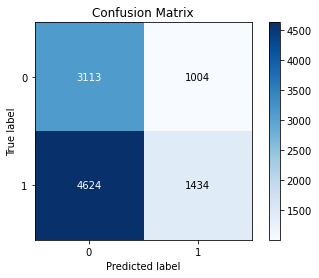

In [399]:
skplt.metrics.plot_confusion_matrix(y_pred.round(), y_test)

In [446]:
et = ExtraTreesRegressor(n_jobs=-1,n_estimators=500)
rf = RandomForestClassifier(max_depth=8,bootstrap=True,n_jobs=-1,n_estimators=200,max_features='sqrt')
xgb = xgboost.XGBRegressor(n_jobs=-1,colsample_bytree=0.7, learning_rate=0.07,
                           max_depth=5, min_child_weight=4, n_estimators=500,nthread=4, subsample=0.7)
gbr = GradientBoostingRegressor(random_state=0)
xgb = xgboost.XGBRegressor(n_jobs=-1)
et = ExtraTreesRegressor(n_jobs=-1)
ds = DecisionTreeRegressor()
catboost_reg = CatBoostClassifier()

In [447]:
pipelines = {
"LinearRegression": LinearRegression(),
"AdaBoostRegressor":AdaBoostClassifier(random_state=0, n_estimators=100),
"ElasticNet":ElasticNet(random_state=0),
"GradientBoostingRegressor":GradientBoostingRegressor(random_state=0),
"DecisionTreeRegressor": DecisionTreeRegressor(),
"ExtraTreesRegressor": ExtraTreesRegressor(n_jobs=-1),
"RandomForestRegressor": RandomForestClassifier(n_jobs=-1),
"XGBRegressor":xgboost.XGBRegressor(n_jobs=-1),
"LGBM": LGBMClassifier(boosting_type='gbdt',num_leaves=31,max_depth=-1,learning_rate=0.1,n_estimators=150,subsample_for_bin=200000),
"CatBoostRegressor":CatBoostClassifier(iterations=900, depth=5, learning_rate=0.05,loss_function = 'Logloss')
}

In [448]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in pipelines.items():
    if name == 'CatBoostRegressor':
        model.fit(X_train_smote, y_train_smote,verbose=False)
    else:
        model.fit(X_train_smote, y_train_smote)
    #y_test_pre = model.predict(test_df)
    predict_test  = model.predict(X_test)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evaluation-----")
    print("Accuracy Score:", accuracy_score(y_test, predict_test.round()))
    dic["Model"].append(name)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evaluation-----
Accuracy Score: 0.5645208845208846
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.4696805896805897
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evaluation-----
Accuracy Score: 0.7575429975429976
--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.5602948402948403
--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.6178869778869779
--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.6615233415233415
----------------------------------------------

In [450]:
xgb = CatBoostClassifier(iterations=900, depth=5, learning_rate=0.05,loss_function = 'Logloss')
xgb.fit(X_train_smote, y_train_smote)

0:	learn: 0.6909869	total: 21.9ms	remaining: 19.6s
1:	learn: 0.6898011	total: 49.8ms	remaining: 22.4s
2:	learn: 0.6880266	total: 74ms	remaining: 22.1s
3:	learn: 0.6871894	total: 95.7ms	remaining: 21.4s
4:	learn: 0.6850319	total: 121ms	remaining: 21.7s
5:	learn: 0.6840795	total: 144ms	remaining: 21.5s
6:	learn: 0.6830299	total: 166ms	remaining: 21.1s
7:	learn: 0.6814587	total: 188ms	remaining: 21s
8:	learn: 0.6802249	total: 211ms	remaining: 20.9s
9:	learn: 0.6787866	total: 233ms	remaining: 20.7s
10:	learn: 0.6771743	total: 257ms	remaining: 20.8s
11:	learn: 0.6763495	total: 280ms	remaining: 20.7s
12:	learn: 0.6760279	total: 305ms	remaining: 20.8s
13:	learn: 0.6746108	total: 330ms	remaining: 20.9s
14:	learn: 0.6740670	total: 353ms	remaining: 20.8s
15:	learn: 0.6731682	total: 375ms	remaining: 20.7s
16:	learn: 0.6726189	total: 398ms	remaining: 20.6s
17:	learn: 0.6719961	total: 422ms	remaining: 20.7s
18:	learn: 0.6713726	total: 444ms	remaining: 20.6s
19:	learn: 0.6709273	total: 467ms	remaini

165:	learn: 0.5962721	total: 4.46s	remaining: 19.7s
166:	learn: 0.5960719	total: 4.5s	remaining: 19.7s
167:	learn: 0.5958357	total: 4.52s	remaining: 19.7s
168:	learn: 0.5958037	total: 4.55s	remaining: 19.7s
169:	learn: 0.5955025	total: 4.57s	remaining: 19.6s
170:	learn: 0.5948791	total: 4.59s	remaining: 19.6s
171:	learn: 0.5946184	total: 4.61s	remaining: 19.5s
172:	learn: 0.5943132	total: 4.63s	remaining: 19.5s
173:	learn: 0.5933791	total: 4.66s	remaining: 19.4s
174:	learn: 0.5931480	total: 4.68s	remaining: 19.4s
175:	learn: 0.5930100	total: 4.71s	remaining: 19.4s
176:	learn: 0.5929433	total: 4.73s	remaining: 19.3s
177:	learn: 0.5925753	total: 4.75s	remaining: 19.3s
178:	learn: 0.5923890	total: 4.77s	remaining: 19.2s
179:	learn: 0.5920188	total: 4.79s	remaining: 19.2s
180:	learn: 0.5919429	total: 4.81s	remaining: 19.1s
181:	learn: 0.5910050	total: 4.83s	remaining: 19.1s
182:	learn: 0.5907007	total: 4.87s	remaining: 19.1s
183:	learn: 0.5904685	total: 4.89s	remaining: 19s
184:	learn: 0.5

327:	learn: 0.5359697	total: 8.44s	remaining: 14.7s
328:	learn: 0.5354111	total: 8.46s	remaining: 14.7s
329:	learn: 0.5352079	total: 8.48s	remaining: 14.7s
330:	learn: 0.5351570	total: 8.5s	remaining: 14.6s
331:	learn: 0.5351097	total: 8.52s	remaining: 14.6s
332:	learn: 0.5347068	total: 8.55s	remaining: 14.6s
333:	learn: 0.5345308	total: 8.57s	remaining: 14.5s
334:	learn: 0.5339793	total: 8.59s	remaining: 14.5s
335:	learn: 0.5338878	total: 8.61s	remaining: 14.5s
336:	learn: 0.5337916	total: 8.64s	remaining: 14.4s
337:	learn: 0.5335572	total: 8.66s	remaining: 14.4s
338:	learn: 0.5332360	total: 8.69s	remaining: 14.4s
339:	learn: 0.5331878	total: 8.71s	remaining: 14.3s
340:	learn: 0.5329906	total: 8.73s	remaining: 14.3s
341:	learn: 0.5329451	total: 8.75s	remaining: 14.3s
342:	learn: 0.5327730	total: 8.77s	remaining: 14.2s
343:	learn: 0.5327011	total: 8.8s	remaining: 14.2s
344:	learn: 0.5326071	total: 8.83s	remaining: 14.2s
345:	learn: 0.5325188	total: 8.85s	remaining: 14.2s
346:	learn: 0.

487:	learn: 0.5107283	total: 12.4s	remaining: 10.5s
488:	learn: 0.5105128	total: 12.5s	remaining: 10.5s
489:	learn: 0.5104821	total: 12.5s	remaining: 10.5s
490:	learn: 0.5102909	total: 12.5s	remaining: 10.4s
491:	learn: 0.5102012	total: 12.6s	remaining: 10.4s
492:	learn: 0.5101643	total: 12.6s	remaining: 10.4s
493:	learn: 0.5101235	total: 12.6s	remaining: 10.4s
494:	learn: 0.5101039	total: 12.6s	remaining: 10.3s
495:	learn: 0.5100827	total: 12.6s	remaining: 10.3s
496:	learn: 0.5100624	total: 12.7s	remaining: 10.3s
497:	learn: 0.5100154	total: 12.7s	remaining: 10.2s
498:	learn: 0.5097240	total: 12.7s	remaining: 10.2s
499:	learn: 0.5095170	total: 12.7s	remaining: 10.2s
500:	learn: 0.5094796	total: 12.8s	remaining: 10.2s
501:	learn: 0.5094464	total: 12.8s	remaining: 10.1s
502:	learn: 0.5094231	total: 12.8s	remaining: 10.1s
503:	learn: 0.5091743	total: 12.8s	remaining: 10.1s
504:	learn: 0.5091197	total: 12.9s	remaining: 10.1s
505:	learn: 0.5089500	total: 12.9s	remaining: 10s
506:	learn: 0.

652:	learn: 0.4961252	total: 16.6s	remaining: 6.29s
653:	learn: 0.4960901	total: 16.6s	remaining: 6.26s
654:	learn: 0.4959736	total: 16.7s	remaining: 6.24s
655:	learn: 0.4959529	total: 16.7s	remaining: 6.21s
656:	learn: 0.4959248	total: 16.7s	remaining: 6.18s
657:	learn: 0.4958951	total: 16.7s	remaining: 6.16s
658:	learn: 0.4958783	total: 16.8s	remaining: 6.13s
659:	learn: 0.4958444	total: 16.8s	remaining: 6.1s
660:	learn: 0.4958275	total: 16.8s	remaining: 6.08s
661:	learn: 0.4958044	total: 16.8s	remaining: 6.05s
662:	learn: 0.4957808	total: 16.9s	remaining: 6.03s
663:	learn: 0.4956864	total: 16.9s	remaining: 6s
664:	learn: 0.4956254	total: 16.9s	remaining: 5.97s
665:	learn: 0.4953631	total: 16.9s	remaining: 5.95s
666:	learn: 0.4952798	total: 17s	remaining: 5.92s
667:	learn: 0.4951421	total: 17s	remaining: 5.9s
668:	learn: 0.4951166	total: 17s	remaining: 5.87s
669:	learn: 0.4949504	total: 17s	remaining: 5.85s
670:	learn: 0.4949283	total: 17.1s	remaining: 5.82s
671:	learn: 0.4949003	tot

811:	learn: 0.4880349	total: 20.7s	remaining: 2.25s
812:	learn: 0.4880157	total: 20.8s	remaining: 2.22s
813:	learn: 0.4879910	total: 20.8s	remaining: 2.2s
814:	learn: 0.4879695	total: 20.8s	remaining: 2.17s
815:	learn: 0.4879393	total: 20.8s	remaining: 2.15s
816:	learn: 0.4879093	total: 20.9s	remaining: 2.12s
817:	learn: 0.4877333	total: 20.9s	remaining: 2.1s
818:	learn: 0.4876967	total: 20.9s	remaining: 2.07s
819:	learn: 0.4876695	total: 21s	remaining: 2.05s
820:	learn: 0.4876483	total: 21s	remaining: 2.02s
821:	learn: 0.4876140	total: 21s	remaining: 2s
822:	learn: 0.4875178	total: 21.1s	remaining: 1.97s
823:	learn: 0.4874904	total: 21.1s	remaining: 1.94s
824:	learn: 0.4874220	total: 21.1s	remaining: 1.92s
825:	learn: 0.4873975	total: 21.2s	remaining: 1.9s
826:	learn: 0.4873159	total: 21.2s	remaining: 1.87s
827:	learn: 0.4872142	total: 21.2s	remaining: 1.84s
828:	learn: 0.4872060	total: 21.2s	remaining: 1.82s
829:	learn: 0.4871435	total: 21.3s	remaining: 1.79s
830:	learn: 0.4871141	to

In [451]:
y_pred_xgb = xgb.predict(X_test)

In [452]:
print("Precision: ", precision_score(y_test, y_pred_xgb.round()))
print("Recall Score: ", recall_score(y_test ,y_pred_xgb.round()))
print("F1 score: ", f1_score( y_test, y_pred_xgb.round()))

Precision:  0.2631578947368421
Recall Score:  0.02229428455614106
F1 score:  0.041106128550074734


In [406]:
import pickle
# open a file, where you ant to store the data
file = open('XGBRegressor.pkl', 'wb')

# dump information to that file
pickle.dump(xgb, file)

In [313]:
test_data

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Premium,Response,city_code,Policy_cat
0,0.518650,1,0,0.315789,0,0.235746,0,0,0
1,0.180203,0,1,1.000000,0,0.711930,0,0,0
2,0.602454,0,0,0.245614,0,0.130382,1,0,0
3,0.706766,0,1,0.596491,0,0.390893,0,2,0
4,0.353464,1,0,0.456140,0,0.204878,0,0,2
...,...,...,...,...,...,...,...,...,...
50877,0.136283,1,0,0.070175,0,0.136787,0,0,0
50878,0.676086,1,0,0.157895,0,0.078885,0,0,1
50879,0.071209,1,0,0.789474,0,0.229341,0,0,2
50880,0.000484,0,1,0.929825,0,0.653149,1,0,2


In [407]:
result = xgb.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0
1,50884,0
2,50885,0
3,50886,0
4,50887,0
...,...,...
21800,72683,0
21801,72684,0
21802,72685,0
21803,72686,0


In [408]:
res.to_csv("XGBRegressor.csv", index = False)

## Over Sampling

In [453]:
from imblearn.over_sampling import RandomOverSampler
os = RandomOverSampler(0.75)
X_train_ns, y_train_ns = os.fit_resample(X_train, y_train)

In [454]:
dic =  {"Model":[],"R2_Train":[],"RMSE_Train":[]}
for name, model in pipelines.items():
    if name == 'CatBoostRegressor':
        model.fit(X_train_ns, y_train_ns,verbose=False)
    else:
        model.fit(X_train_ns, y_train_ns)
    #y_test_pre = model.predict(test_df)
    predict_test  = model.predict(X_test)
    print("--------------------------------------------------------------")
    print("Model:", name)
    print("-----Training Data Evaluation-----")
    print("Accuracy Score:", accuracy_score(y_test, predict_test.round()))
    dic["Model"].append(name)

--------------------------------------------------------------
Model: LinearRegression
-----Training Data Evaluation-----
Accuracy Score: 0.7575429975429976
--------------------------------------------------------------
Model: AdaBoostRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.7552825552825553
--------------------------------------------------------------
Model: ElasticNet
-----Training Data Evaluation-----
Accuracy Score: 0.7575429975429976
--------------------------------------------------------------
Model: GradientBoostingRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.7552825552825553
--------------------------------------------------------------
Model: DecisionTreeRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.6346928746928747
--------------------------------------------------------------
Model: ExtraTreesRegressor
-----Training Data Evaluation-----
Accuracy Score: 0.7094840294840294
----------------------------------------------

In [456]:
mod = GradientBoostingRegressor()
mod.fit(X_train_ns, y_train_ns)

GradientBoostingRegressor()

In [412]:
# Sequential feature Selection
sf = sfs(estimator = GradientBoostingRegressor(), k_features="best", forward = True, verbose = 2, scoring = "accuracy", cv = 3)
sfsmodel = sf.fit(X_train_ns, y_train_ns)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   17.5s finished

[2021-02-28 23:31:44] Features: 1/8 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   35.9s finished

[2021-02-28 23:32:20] Features: 2/8 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   31.9s finished

[2021-02-28 23:32:52] Features: 3/8 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.1s remaining:    0

KeyError: None

In [413]:
print("Features: ", sfsmodel.k_feature_names_)
print("Rscore: ", sfsmodel.k_score_)

Features:  ('Region_Code', 'Accomodation_Type', 'Upper_Age', 'Reco_Policy_Premium', 'city_code', 'Policy_cat')
Rscore:  -0.8774051665712573


In [457]:
y_pred_ns = mod.predict(X_test)

In [460]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_ns.round()))

Accuracy Score: 0.7552825552825553


In [461]:
print("Precision: ", precision_score(y_test, y_pred_ns.round()))
print("Recall Score: ", recall_score(y_test ,y_pred_ns.round()))
print("F1 score: ", f1_score( y_test, y_pred_ns.round()))

Precision:  0.2830188679245283
Recall Score:  0.006080259424402107
F1 score:  0.011904761904761904


In [462]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoost.pkl', 'wb')

# dump information to that file
pickle.dump(mod, file)

In [463]:
result = mod.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0.448815
1,50884,0.436720
2,50885,0.434903
3,50886,0.425084
4,50887,0.424405
...,...,...
21800,72683,0.430862
21801,72684,0.431472
21802,72685,0.433525
21803,72686,0.421117


In [464]:
res.to_csv("GradientBoost2.csv", index = False)

In [417]:
from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in extra tree
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 40, num = 8)]
# Minimum number of samples required to split a node
min_samples_split = [2,3,4, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4, 5, 10]

In [418]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [422]:
gbr = RandomizedSearchCV(estimator = mod, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 2, verbose=2, random_state=42, n_jobs = 1)

In [423]:
gbr.fit(X_train_ns, y_train_ns)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   6.9s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   7.4s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, max_features=log2, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  16.3s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=  17.1s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators=200; total time=  31.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=3, min_samples_split=3, n_estimators

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              15, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [424]:
gbr.best_params_

{'n_estimators': 200,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 25}

In [425]:
y_pred_hp = gbr.predict(X_test)

In [426]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_hp.round()))

Accuracy Score: 0.6941523341523341


In [427]:
print("Precision: ", precision_score(y_test, y_pred_hp.round()))
print("Recall Score: ", recall_score(y_test ,y_pred_hp.round()))
print("F1 score: ", f1_score(y_test, y_pred_hp.round()))

Precision:  0.27887139107611547
Recall Score:  0.17432321575061527
F1 score:  0.21453811206461385


In [428]:
import pickle
# open a file, where you ant to store the data
file = open('GradientBoostHyper.pkl', 'wb')

# dump information to that file
pickle.dump(gbr, file)

In [174]:
X_train_ns.head()

,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Is_Spouse,Reco_Policy_Cat,Reco_Policy_Premium,city_code
0,2989,0,1,38,1,21,21351.0,0
1,491,1,0,65,0,3,20160.0,0
2,2923,1,0,47,0,19,13442.0,0
3,904,1,0,18,0,15,2408.0,1
4,600,0,0,46,0,16,13662.0,2


In [429]:
result = gbr.predict(test_data)
res = pd.DataFrame({"ID" : test["ID"],
                    "Response": result})
res

,ID,Response
0,50883,0.455032
1,50884,0.415921
2,50885,0.119199
3,50886,0.194626
4,50887,0.254277
...,...,...
21800,72683,0.284243
21801,72684,0.025699
21802,72685,0.219179
21803,72686,0.612938


In [430]:
res.to_csv("GradientBoostingHyper.csv", index = False)